In [13]:
import numpy as np

def AuAgAlloyDielectricModel(GMF):
    # DielectricModel computes the dielectric function of a Gold-Silver alloy
    # with gold molar fraction equal to GMF, according to the presented model.
    # GMF takes values between 0 (pure silver) and 1 (pure gold).
    # Example: Lambda, AuAg5050 = DielectricModel(0.5);
    c = 2.99792458e17  # Speed of light, in nm/s
    h = 4.135667516e-15  # Planck's constant, in eV.s
    Lambda = np.arange(300, 311, dtype=np.float64)  # In nm
    omega = h*c/Lambda  # In eV
    ModelParameters = np.array([[8.9234,8.5546,9.0218],  # wp
                                [0.042389,0.022427,0.16713],  # gammap
                                [2.2715,1.7381,2.2838],  # einf
                                [2.6652,4.0575,3.0209],  # wg1
                                [2.3957,3.9260,2.7976],  # w01
                                [0.17880,0.017723,0.18833],  # gamma1
                                [73.251,51.217,22.996],  # A1
                                [3.5362,4.1655,3.3400],  # w02
                                [0.35467,0.18819,0.68309],  # gamma2
                                [40.007,30.770,57.540]], dtype=np.float64)  # A2

    wp = GMF**2*(2*ModelParameters[0,0] - 4*ModelParameters[0,2] + 2*ModelParameters[0,1]) \
        + GMF*(-ModelParameters[0,0] + 4*ModelParameters[0,2] - 3*ModelParameters[0,1]) \
        + ModelParameters[0,1]
    
    gammap = GMF**2*(2*ModelParameters[1,0] - 4*ModelParameters[1,2] + 2*ModelParameters[1,1]) \
            + GMF*(-ModelParameters[1,0] + 4*ModelParameters[1,2] - 3*ModelParameters[1,1]) \
            + ModelParameters[1,1]
    
    einf = GMF**2*(2*ModelParameters[2,0] - 4*ModelParameters[2,2] + 2*ModelParameters[2,1]) \
          + GMF*(-ModelParameters[2,0] + 4*ModelParameters[2,2] - 3*ModelParameters[2,1]) \
          + ModelParameters[2,1]
    
    wg1 = GMF**2*(2*ModelParameters[3,0] - 4*ModelParameters[3,2] + 2*ModelParameters[3,1]) \
         + GMF*(-ModelParameters[3,0] + 4*ModelParameters[3,2] - 3*ModelParameters[3,1]) \
         + ModelParameters[3,1]
    
    w01 = GMF**2*(2*ModelParameters[4,0] - 4*ModelParameters[4,2] + 2*ModelParameters[4,1]) \
         + GMF*(-ModelParameters[4,0] + 4*ModelParameters[4,2] - 3*ModelParameters[4,1]) \
         + ModelParameters[4,1]
    
    gamma1 = GMF**2*(2*ModelParameters[5,0] - 4*ModelParameters[5,2] + 2*ModelParameters[5,1]) \
            + GMF*(-ModelParameters[5,0] + 4*ModelParameters[5,2] - 3*ModelParameters[5,1]) \
            + ModelParameters[5,1]
    
    A1 = GMF**2*(2*ModelParameters[6,0] - 4*ModelParameters[6,2] + 2*ModelParameters[6,1]) \
        + GMF*(-ModelParameters[6,0] + 4*ModelParameters[6,2] - 3*ModelParameters[6,1]) \
        + ModelParameters[6,1]
    
    w02 = GMF**2*(2*ModelParameters[7,0] - 4*ModelParameters[7,2] + 2*ModelParameters[7,1]) \
         + GMF*(-ModelParameters[7,0] + 4*ModelParameters[7,2] - 3*ModelParameters[7,1]) \
         + ModelParameters[7,1]
    
    gamma2 = GMF**2*(2*ModelParameters[8,0] - 4*ModelParameters[8,2] + 2*ModelParameters[8,1]) \
            + GMF*(-ModelParameters[8,0] + 4*ModelParameters[8,2] - 3*ModelParameters[8,1]) \
            + ModelParameters[8,1]
    
    A2 = GMF**2*(2*ModelParameters[9,0] - 4*ModelParameters[9,2] + 2*ModelParameters[9,1]) \
        + GMF*(-ModelParameters[9,0] + 4*ModelParameters[9,2] - 3*ModelParameters[9,1]) \
        + ModelParameters[9,1]
    
    Drude = einf - (wp**2 / ((omega**2) + 1j*gammap*omega))
    
    CP1 = A1*((1/((omega+1j*gamma1)**2)) * (-np.sqrt(omega+1j*gamma1 - wg1)*np.arctan(np.sqrt((wg1-w01)/(omega+1j*gamma1 - wg1)))) 
            + (1/((omega+1j*gamma1)**2)) * (-np.sqrt(omega+1j*gamma1 + wg1)*np.arctanh(np.sqrt((wg1 - w01)/(omega+1j*gamma1 + wg1)))) 
            + (1/((omega+1j*gamma1)**2)) * (2*np.sqrt(wg1)*np.arctanh(np.sqrt((wg1 - w01)/wg1))) 
            - np.sqrt(wg1 - w01)*np.log(1 - ((omega + 1j*gamma1)/w01)**2) / (2*(omega + 1j*gamma1)**2))

    CP2 = - A2 * np.log(1 - ((omega + 1j*gamma2)/w02)**2) / (2*(omega + 1j*gamma2)**2)
# Display all the numbers
    print('GMF:', GMF)
    print('ModelParameters:')
    for row in ModelParameters:
        print(row)
    print('Result (wp):', wp)
    #print(f'CP1 is {CP1}')
    #print(f'CP2 is {CP2}')
    #print(f'Drude is {Drude}')
    DielectricFunction = Drude + CP1 + CP2
    return Lambda, DielectricFunction  # Make sure to define and calculate DielectricFunction


In [16]:
AuAgAlloyDielectricModel(.5)

GMF: 0.5
ModelParameters:
[8.9234 8.5546 9.0218]
[0.042389 0.022427 0.16713 ]
[2.2715 1.7381 2.2838]
[2.6652 4.0575 3.0209]
[2.3957 3.926  2.7976]
[0.1788   0.017723 0.18833 ]
[73.251 51.217 22.996]
[3.5362 4.1655 3.34  ]
[0.35467 0.18819 0.68309]
[40.007 30.77  57.54 ]
Result (wp): 9.0218


(array([300., 301., 302., 303., 304., 305., 306., 307., 308., 309., 310.]),
 array([-0.60249176+4.57288571j, -0.60014738+4.58045529j,
        -0.59776388+4.58762802j, -0.59534784+4.59439871j,
        -0.59290606+4.60076229j, -0.59044556+4.60671381j,
        -0.58797361+4.61224847j, -0.58549767+4.61736157j,
        -0.58302544+4.62204859j, -0.58056485+4.62630518j,
        -0.57812402+4.63012714j]))

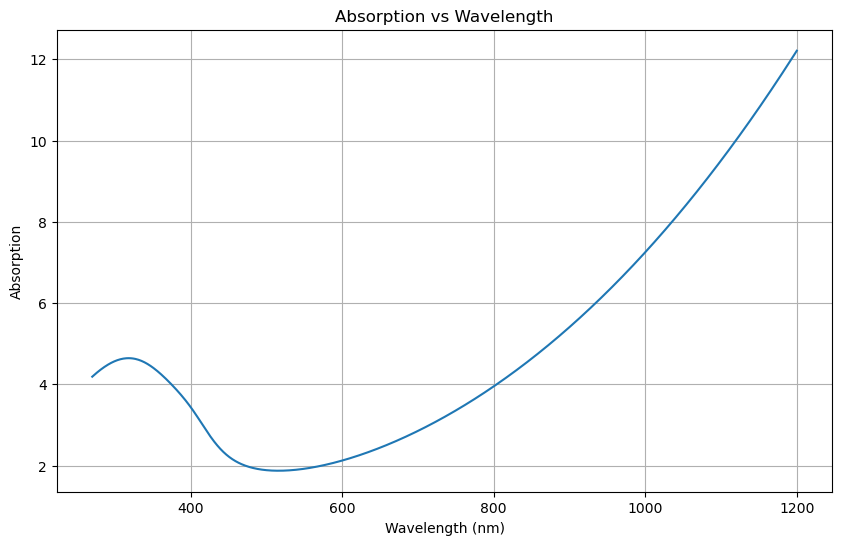

In [6]:
import matplotlib.pyplot as plt

# Call your function and get the DielectricFunction
Lambda, DielectricFunction = AuAgAlloyDielectricModel(.5)

# Absorption is the imaginary part of the Dielectric Function
absorption = DielectricFunction.imag

# Plot
plt.figure(figsize=(10,6))
plt.plot(Lambda, absorption)
plt.title("Absorption vs Wavelength")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorption")
plt.grid(True)
plt.show()


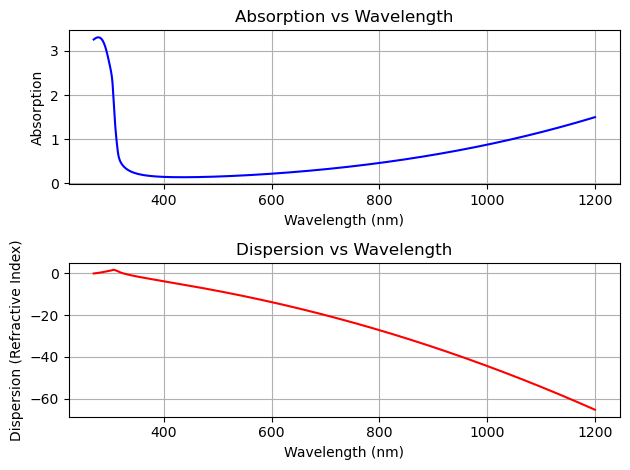

In [9]:
import matplotlib.pyplot as plt

# Call your function and get the DielectricFunction
Lambda, DielectricFunction = AuAgAlloyDielectricModel(0)

# Absorption is the imaginary part of the Dielectric Function
absorption = DielectricFunction.imag

# Dispersion (refractive index) is the real part of the Dielectric Function
dispersion = DielectricFunction.real

# Create subplots
fig, axs = plt.subplots(2)

# Plot Absorption
axs[0].plot(Lambda, absorption, color='blue')
axs[0].set_title("Absorption vs Wavelength")
axs[0].set_xlabel("Wavelength (nm)")
axs[0].set_ylabel("Absorption")
axs[0].grid(True)

# Plot Dispersion
axs[1].plot(Lambda, dispersion, color='red')
axs[1].set_title("Dispersion vs Wavelength")
axs[1].set_xlabel("Wavelength (nm)")
axs[1].set_ylabel("Dispersion (Refractive Index)")
axs[1].grid(True)

# Adjust layout for readability
fig.tight_layout()
plt.show()
